## Plot comparision of surface oiling and mass on beaches to illustrate trajectories of different spill volumes
- Oil: Bunker-C
- Location: Straight of Georgia
- Date: June 05, 2015
- Spill volumes informed by Marathassa, COSCO Busan, and DBL-152 in [Past Spill Events & Vessel Info](https://docs.google.com/spreadsheets/d/1AQGhAMGJUqlbZMeX0FmVuT5PU9dTrKyYepdN5y7xNn4/edit#gid=632012283) spreadsheet (with a "too small to document" and  10x largest ship spill as book-ends)
- Spill location in SOG: -123.67 E, 49.21 N

In [47]:
import sys
sys.path.insert(1, '/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import xarray as xr

from midoss_utils import *
import cmocean as cm
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools as gt 

# set figure fontsizes
fs=12 
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs+4)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
%matplotlib inline

### load model output

In [13]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/volume_test')
# volume information
volume_str = ["0p01", "3", "200", "7000", "70000"]
volume_amounts = [0.01, 3, 300, 7000, 70000]
units = 'meters cubed'

# allocate variables
fname = {}
results = {}
volume_sfc = {}
thick2d_sum = {}

for volume in volume_str: 
    print(f'starting {volume}')
    fname[volume] = results_path/f'Lagrangian_out_{volume}.nc'
    results[volume] = xr.open_dataset(fname[volume])
    thick2d = results[volume].Thickness_2D
    thick2d_sum[volume] = thick2d.sum(dim='time')
    volume_sfc[volume] = results[volume]['OilWaterColumnOilVol_3D'][:,39,:,:].sum(dim='time')

starting 0p01
starting 3
starting 200
starting 7000
starting 70000


## To start with, show "footprint" of oiling via time-integrated values

<ipython-input-82-9d517f7ed06a>:17: RuntimeWarning: divide by zero encountered in log10
  np.log10(thick2d_sum[volume].values),
<ipython-input-82-9d517f7ed06a>:17: RuntimeWarning: invalid value encountered in log10
  np.log10(thick2d_sum[volume].values),
<ipython-input-82-9d517f7ed06a>:54: RuntimeWarning: divide by zero encountered in log10
  np.log10(volume_sfc[volume].values),


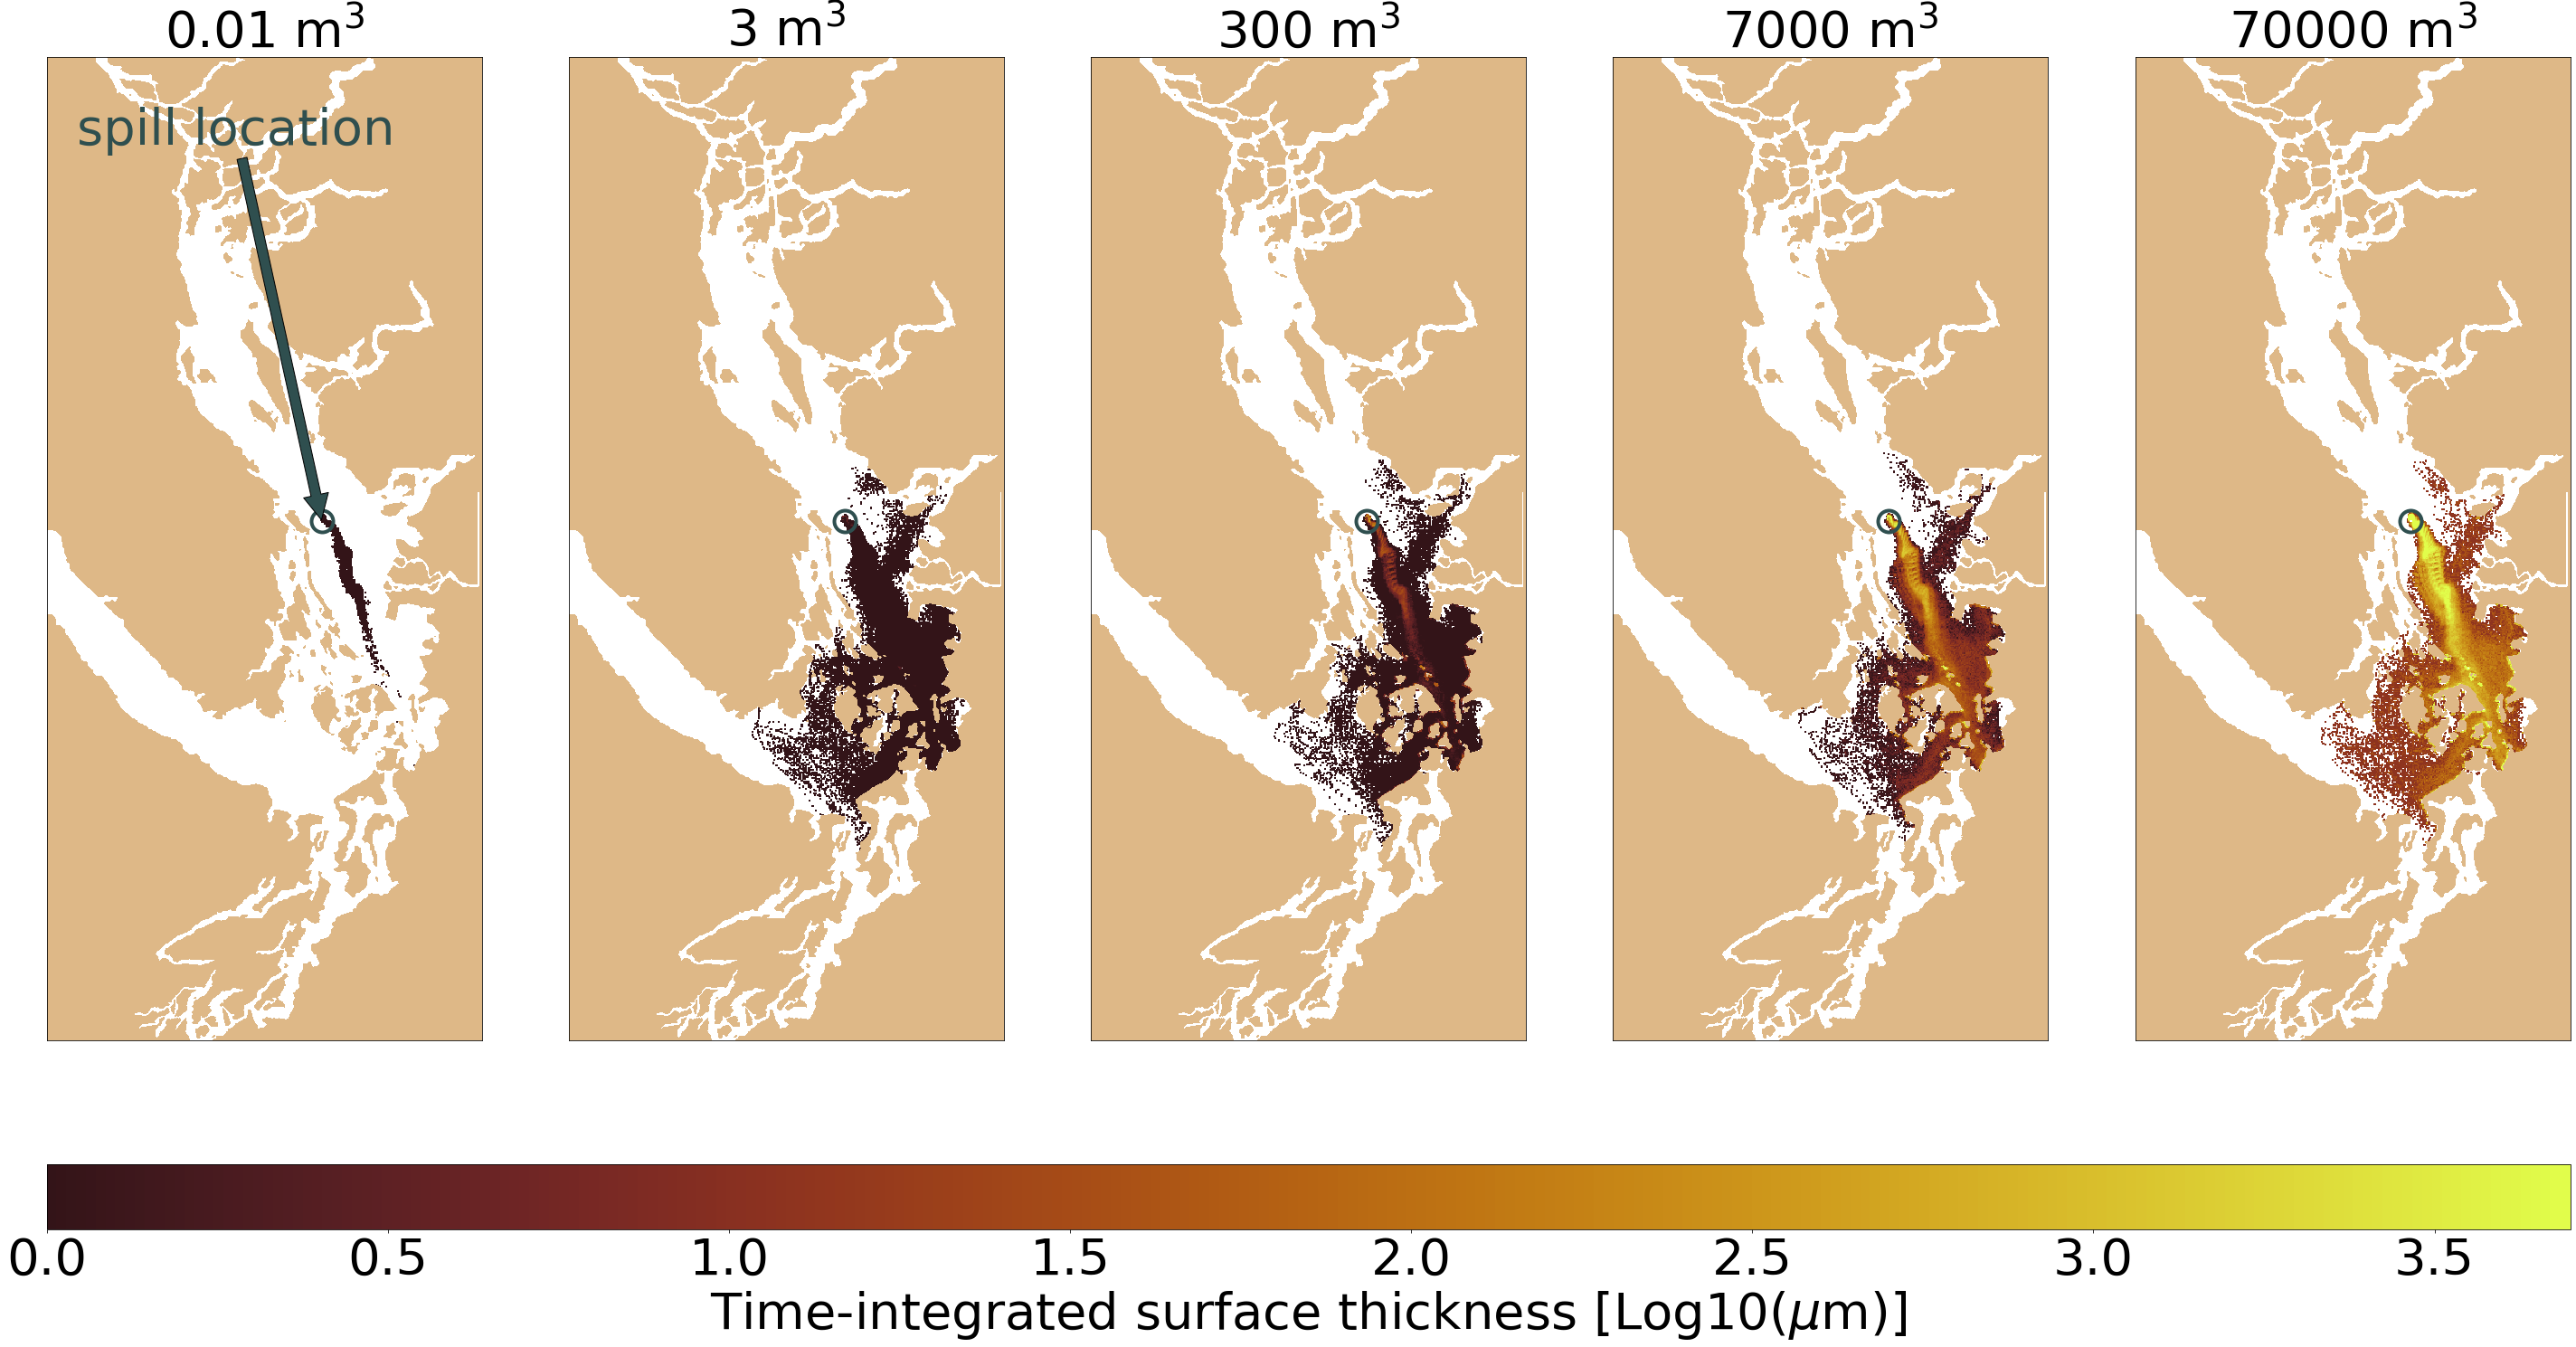

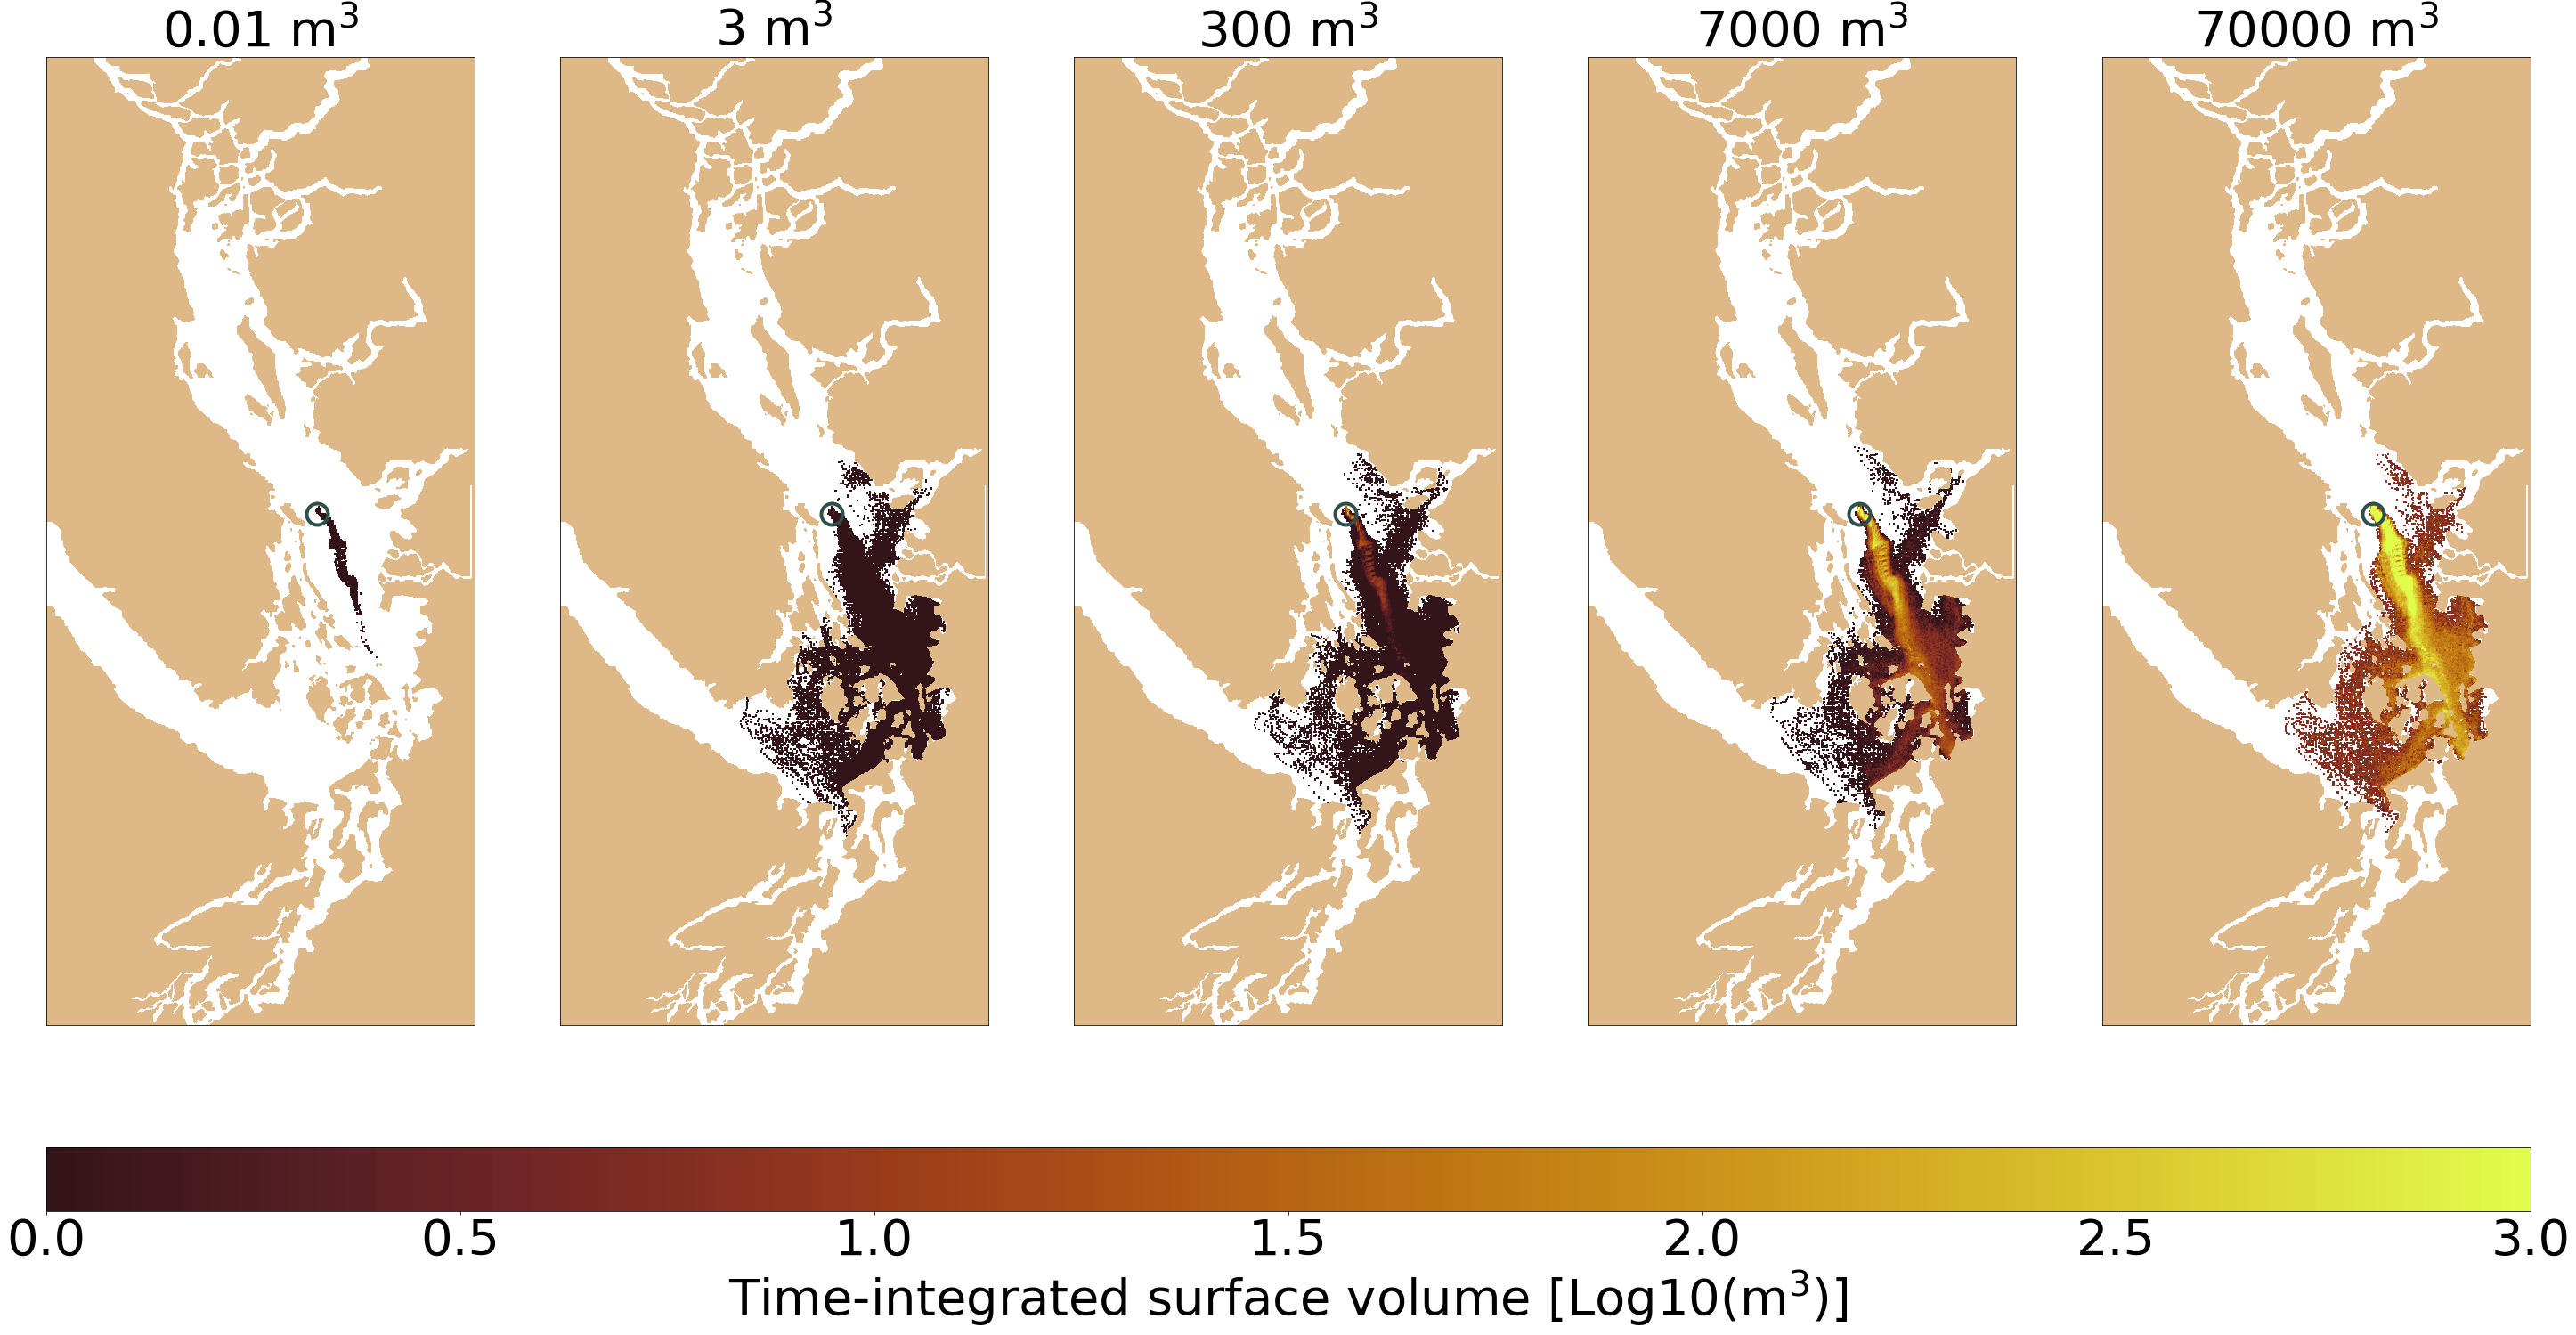

In [82]:
fig1 = plt.figure(figsize=(50,20))
fig2 = plt.figure(figsize=(50,20))

# get spill location in grid coordinates
[ygd,xgd]=gt.find_closest_model_point(
    -123.67, 
    49.21,results[volume].Longitude,
    results[volume].Latitude
)

# loop over all volumes and plot thickness in upper panels with volumes in lower
for plot_index,volume in enumerate(volume_str):
    
    ax1 = fig1.add_subplot(1,5,plot_index+1)
    # convert xarray into numpy using ".values" in order to gain access to different visualization tools
    mappable = ax1.pcolormesh(
        np.log10(thick2d_sum[volume].values), 
        vmin = 0, 
        vmax = np.log10(5000), 
        cmap = cm.cm.solar)
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(ax1,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    ax1.set_title(f'{volume_amounts[plot_index]} m$^3$', fontsize=56)
    ax1.set_xticks([])
    ax1.set_yticks([])
    # add spill location with text in first panel
    ax1.plot(xgd+0.5,ygd+0.5,
                 'o',
                 markerfacecolor='none',
                 color='darkslategrey',
                 markersize=24,
                markeredgewidth=4)
    if plot_index==0:
        ax1.annotate('spill location', xy=(xgd,ygd),  
                xytext=(0.8, 0.95), textcoords='axes fraction',
                arrowprops=dict(facecolor='darkslategrey',arrowstyle='simple'),
                horizontalalignment='right', verticalalignment='top',
                fontsize=56,color='darkslategrey')
                     
    if plot_index==3:
        ax_cbar = fig1.add_axes([0.125, -.02, 0.775, .05]) 
        cbar = plt.colorbar(
            mappable, 
            cax=ax_cbar, 
            orientation='horizontal'
        )
        cbar.ax.tick_params(labelsize=56) 
        cbar.set_label('Time-integrated surface thickness [Log10($\mu$m)]', fontsize = 56);

   
    ax2 = fig2.add_subplot(1,5,plot_index+1)
    # convert xarray into numpy using ".values" in order to gain access to different visualization tools
    mappable = ax2.pcolormesh(
        np.log10(volume_sfc[volume].values), 
        vmin = 0, 
        vmax = 3, 
        cmap = cm.cm.solar)    
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(ax2,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    ax2.set_title(f'{volume_amounts[plot_index]} m$^3$', fontsize=56)
    ax2.set_xticks([])
    ax2.set_yticks([])
    # add spill location with text in first panel
    ax2.plot(xgd+0.5,ygd+0.5,
                 'o',
                 markerfacecolor='none',
                 color='darkslategrey',
                 markersize=24,
                markeredgewidth=4)
    if plot_index==3:
        ax_cbar = fig2.add_axes([0.125, -.02, 0.775, .05]) 
        cbar = plt.colorbar(
            mappable, 
            cax=ax_cbar, 
            orientation='horizontal'
        )
        cbar.ax.tick_params(labelsize=56) 
        cbar.set_label('Time-integrated surface volume [Log10(m$^3$)]', fontsize = 56);
        

## Next: Beaching Volume 

## Next: Mass balance

## Next: Surface Oiling by same spill volume but different oil-type